In [1]:
import os
import rasterio as rio
import pandas as pd
import random
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
basepath = "/home/abetatos/Escritorio/TFM_Dataset/5.Preds/"
hs_path = "/home/abetatos/Escritorio/TFM_Dataset/3.Basedataset/HS/"

In [3]:
masking = "withoutmask_all_sgd_adam_1685536886_model_53_01234567/"
nomapchete = "withoutmask_all_sgd_adam_1685536886_model_53_01234567_nomapchete/"

In [4]:
import pandas as pd

def get_slices(aux, precision): 
    df = pd.DataFrame(aux)
    df[0] = df[0].apply(lambda x: round(x, precision))
    arr = []
    for index, round_df in df.groupby(0):
        arr.append([index, round_df[1].mean()])
    return np.array(arr)

def plot_corr(mask_error, mask1_error, label, ax, show=False):
    grouped_me = list(zip(mask_error, mask1_error))
    grouped_me = get_slices(grouped_me, 1)

    random.shuffle(grouped_me)

    me_flat, me1_flat = np.array(list(zip(*grouped_me[:50000])))

    # xy = np.vstack([me_flat, me1_flat])
    # kernel = gaussian_kde(xy)(xy)
    print(me1_flat.max(), me1_flat.min())
    ax.scatter(me_flat, me1_flat, s=1, label=label) #c=kernel
    # ax.set_ylim(0, max(me_flat.max(), me1_flat.max()))
    ax.set_xlim(0, max(me_flat.max(), me1_flat.max()))
    # ax.set_ylim(0, me1_flat[me_flat < 2].max())
    # ax.set_xlim(0, 2)
    plt.xlabel("HS")
    plt.ylabel(label)
    if show:
        plt.legend()
        plt.show()

snowmap_20160309_ads_100_extent_maskiert_nosnow0_noausreisser
2.235311269760132 1.0365571975708008
2.4695897102355957 1.035913109779358


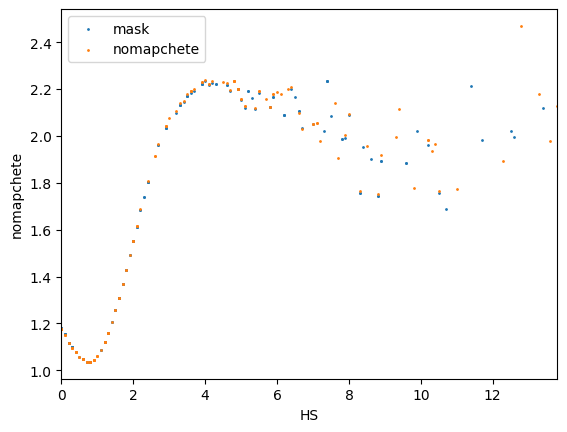

HS_Saflischpass_20220512_1m_epsg2056
4.605958938598633 3.865696907043457
4.601283073425293 3.9118778705596924


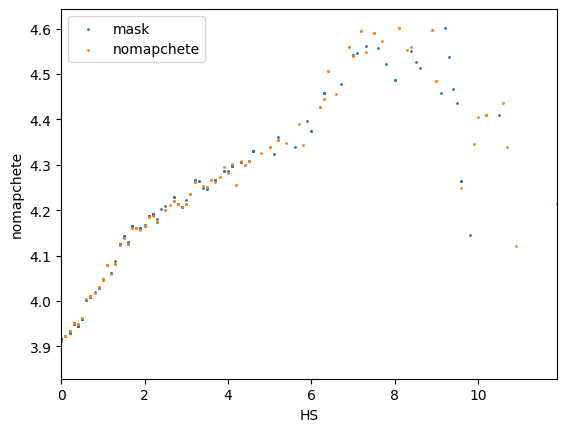

HS_Laucherenalp_20220511_1m_epsg2056
4.754397869110107 2.108189105987549
4.6251420974731445 2.119357109069824


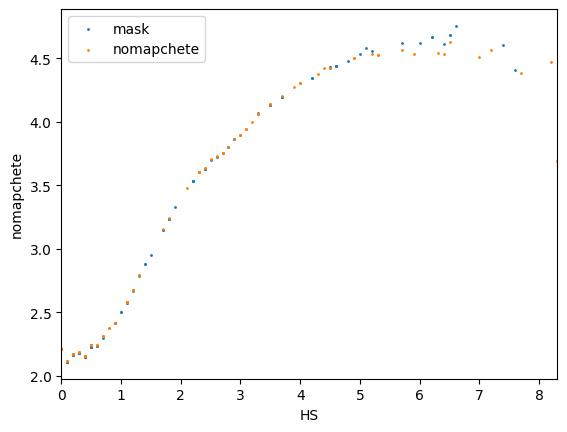

snowmap_2014_ads_100_extent_maskiert_nosnow0_noausreisser
2.8314120769500732 0.9271591305732727
2.827669382095337 0.9247603416442871


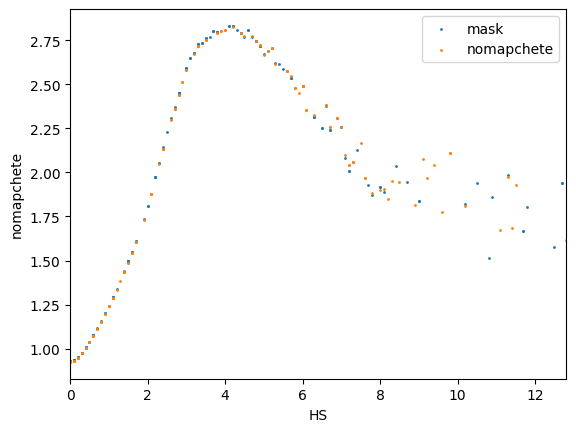

HS_Davos_20200406_2m_epsg2056
2.6656694412231445 0.6655316352844238
2.7675116062164307 0.6665238738059998


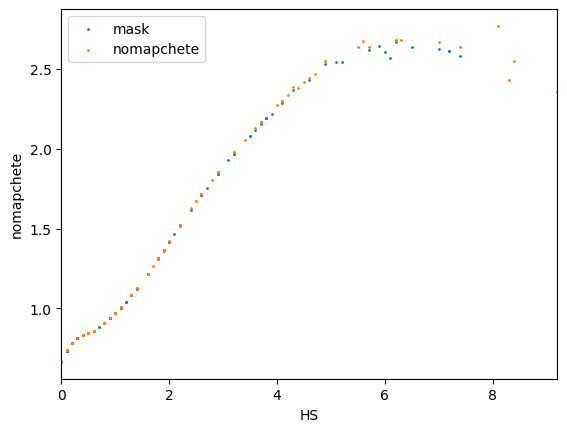

HS_Davos_20211604_2m_epsg2056
2.636087656021118 0.6555467247962952
2.634051561355591 0.6572408080101013


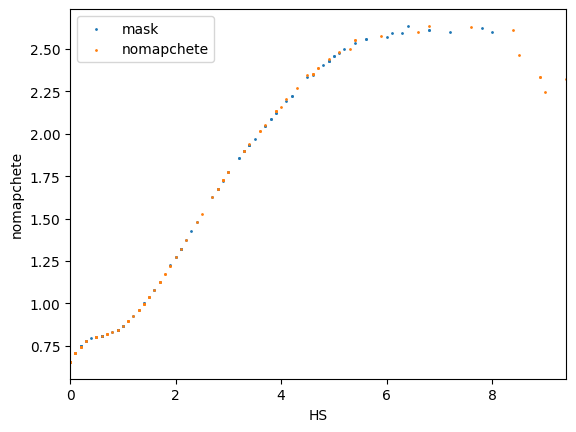

snowmap_2013_ads_80_extent_maskiert_nosnow0_noausreisser
2.8734090328216553 0.9280682802200317
2.887485980987549 0.9306778311729431


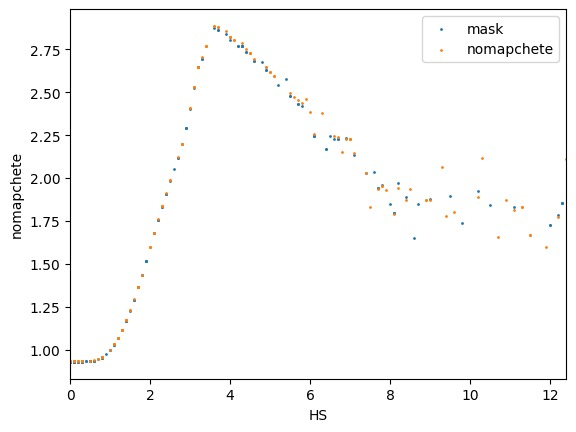

snowmap_2012_ads_80_extent_maskiert_nosnow0_noausreisser
3.6031363010406494 1.0292705297470093
3.6006274223327637 1.0338692665100098


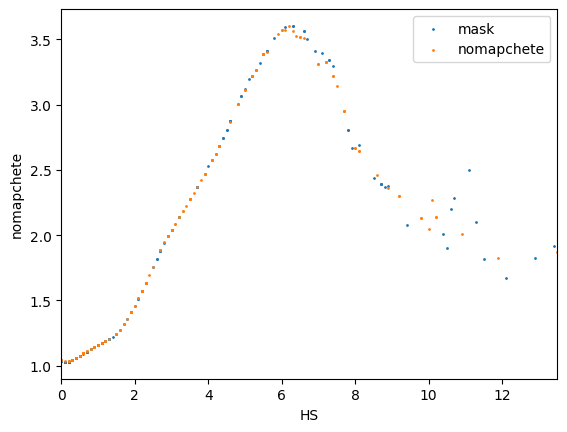

snowmap_2015_ads_100_extent_maskiert_nosnow0_noausreisser
2.721248149871826 0.8387647867202759
2.7283475399017334 0.839286208152771


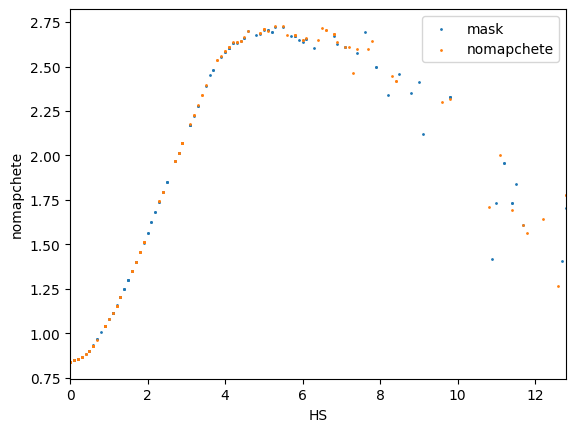

snowmap_20160126_ads_100_extent_maskiert_nosnow0_noausreisser
2.6165199279785156 1.0618069171905518
2.664750576019287 1.0604523420333862


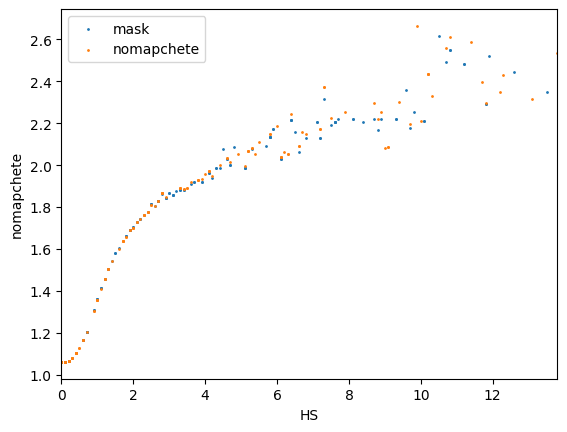

HS_c_20220223_1m_epsg2056
4.4446282386779785 3.363312005996704
4.377699851989746 3.351592540740967


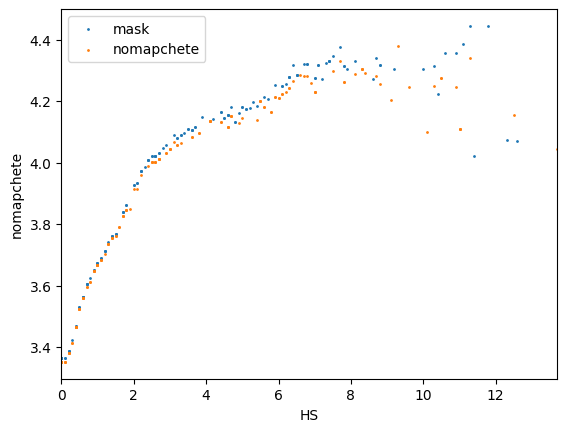

HS_Davos_20170316_2m_epsg2056
2.88156795501709 0.8985826373100281
2.9487411975860596 0.8989659547805786


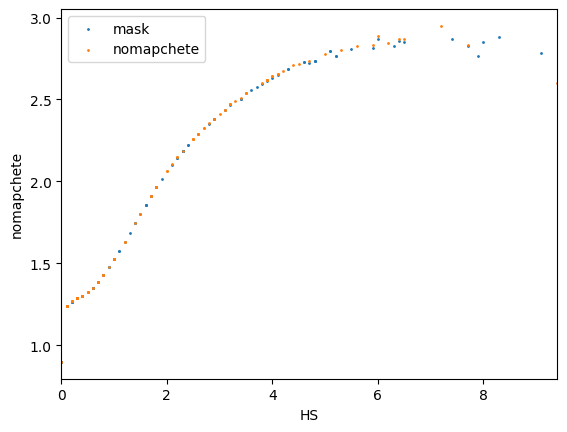

HS_Davos_20180411_2m_epsg2056
2.0218355655670166 0.8693789839744568
2.0000319480895996 0.8845738172531128


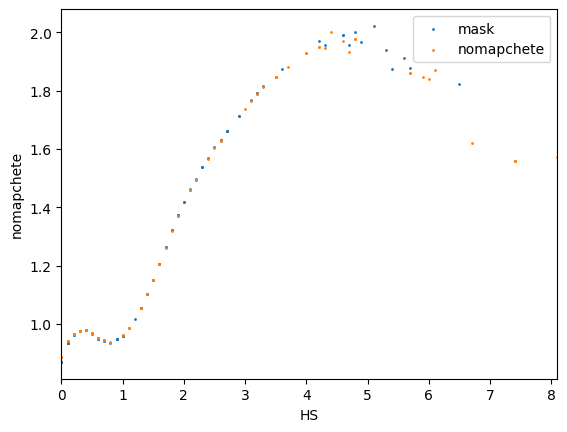

snowmap_20160420_ads_100_extent_maskiert_nosnow0_noausreisser
2.5026345252990723 0.8374913930892944
2.4883267879486084 0.8340449929237366


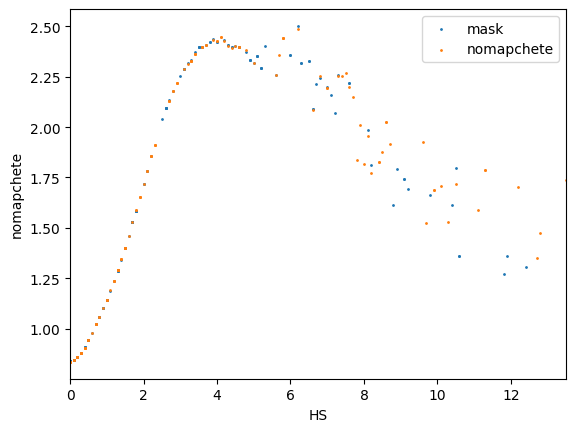

HS_Laucherenalp_20220224_2m_epsg2056
3.261002779006958 0.5677399635314941
3.5079233646392822 0.5498928427696228


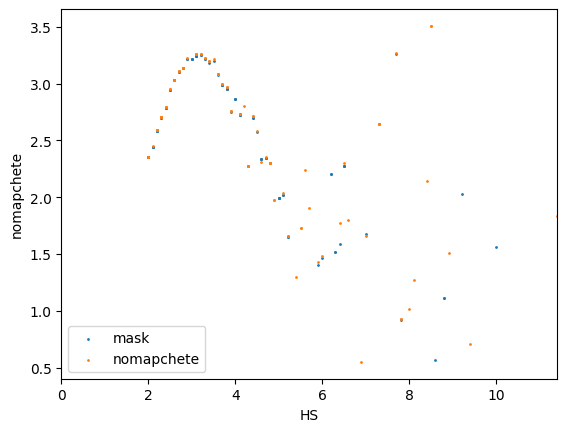

snowmap_2010_ads_80_extent_maskiert_nosnow0_noausreisser
3.766934633255005 0.7899580597877502
3.8280415534973145 0.7882983684539795


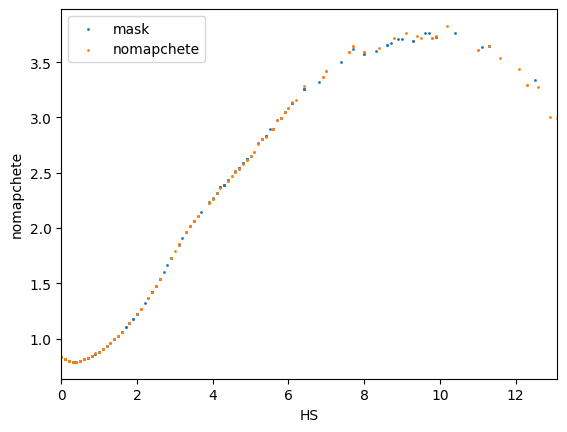

In [9]:
results = pd.DataFrame()
for location in os.listdir(basepath + nomapchete):
    print(location)
    with rio.open(basepath + masking + location + "/HS_pred.tif", "r") as f: 
        masking_arr = f.read()
    with rio.open(basepath + nomapchete + location + "/HS_pred.tif", "r") as f: 
        masking1_arr = f.read()

    with rio.open(hs_path + location + "/HS.tif", "r") as f: 
        hs = f.read()

    mask = (masking_arr!=-9999.) & (masking1_arr!=-9999.)
    mask_error = abs(masking_arr[mask])
    mask1_error = masking1_arr[mask]
    hs = hs[mask]

    fig, ax = plt.subplots()
    plot_corr(hs, mask_error, "mask", ax)
    plot_corr(hs, mask1_error, "nomapchete", ax, show=True)
    
    results.at[location, "mask"] = abs(mask_error).mean()
    results.at[location, "nomapchete"] = abs(mask1_error).mean()

    results.at[location, "mask_std"] = abs(mask_error).std()
    results.at[location, "nomapchete_std"] = abs(mask1_error).std()

In [10]:
print((results['mask']-results['nomapchete']).mean())
results[['mask', 'nomapchete']].style.highlight_min(color = 'blue', 
                       axis = 1)

0.00013430416584014893


,mask,nomapchete
snowmap_20160309_ads_100_extent_maskiert_nosnow0_noausreisser,1.332609,1.333697
HS_Saflischpass_20220512_1m_epsg2056,4.145657,4.143485
HS_Laucherenalp_20220511_1m_epsg2056,3.308051,3.312721
snowmap_2014_ads_100_extent_maskiert_nosnow0_noausreisser,1.450849,1.445403
HS_Davos_20200406_2m_epsg2056,1.221307,1.225611
HS_Davos_20211604_2m_epsg2056,1.225805,1.226295
snowmap_2013_ads_80_extent_maskiert_nosnow0_noausreisser,1.454064,1.457655
snowmap_2012_ads_80_extent_maskiert_nosnow0_noausreisser,1.600216,1.600874
snowmap_2015_ads_100_extent_maskiert_nosnow0_noausreisser,1.338785,1.339523
snowmap_20160126_ads_100_extent_maskiert_nosnow0_noausreisser,1.234645,1.233546


In [11]:
print((results['mask_std']-results['nomapchete_std']).mean())
results[['mask_std', 'nomapchete_std']].style.highlight_min(color = 'blue', 
                       axis = 1)

-0.008828144520521164


,mask_std,nomapchete_std
snowmap_20160309_ads_100_extent_maskiert_nosnow0_noausreisser,0.617871,0.628439
HS_Saflischpass_20220512_1m_epsg2056,0.582203,0.601926
HS_Laucherenalp_20220511_1m_epsg2056,0.852570,0.854000
snowmap_2014_ads_100_extent_maskiert_nosnow0_noausreisser,0.700586,0.704362
HS_Davos_20200406_2m_epsg2056,0.597184,0.608657
HS_Davos_20211604_2m_epsg2056,0.607937,0.618018
snowmap_2013_ads_80_extent_maskiert_nosnow0_noausreisser,0.751626,0.760861
snowmap_2012_ads_80_extent_maskiert_nosnow0_noausreisser,0.754149,0.758897
snowmap_2015_ads_100_extent_maskiert_nosnow0_noausreisser,0.680572,0.692892
snowmap_20160126_ads_100_extent_maskiert_nosnow0_noausreisser,0.560916,0.570031
